In [1]:
using ITensors
using Plots

In [2]:
N = 12
cutoff = 1E-8
tau = 0.05
ttotal = 20.0
hx=2.0*1.05
hz=2.0*0.5
hzz=4.0

Nsteps = Int(ttotal/tau)
s = siteinds("S=1/2",N;conserve_qns=false)

gates = ITensor[]
for j=1:(N-1)
    s1 = s[j]
    s2 = s[j+1]
    if j==(N-1)
        hj =-hzz*op("Sz",s1)* op("Sz",s2)
        hj-= hx * op("Sx",s1)*op("Id",s2)+hz * op("Sz",s1)*op("Id",s2)
        hj-= hx *op("Id",s1)* op("Sx",s2)+hz *op("Id",s1)* op("Sz",s2) 
    else
        hj =-hzz*op("Sz",s1)* op("Sz",s2)
        hj-=hx * op("Sx",s1)*op("Id",s2)+hz * op("Sz",s1)*op("Id",s2) 
    end
    Gj = exp(-1.0im * tau/2 * hj)
    push!(gates,Gj)
end
# Include gates in reverse order too
# (N,N-1),(N-1,N-2),...
append!(gates,reverse(gates))

# All up state
psi = productMPS(s, n -> isodd(n) ? "Up" : "Up")

# Neel state
#psi = productMPS(s, n -> isodd(n) ? "Up" : "Dn")

c = div(N,2) # center site
Sx=[]
push!(Sx,2.0*sum(expect(psi,"Sx";sites=1:N))/N)

for step=1:Nsteps
    psi = apply(gates, psi; cutoff=cutoff)
    normalize!(psi)
    push!(Sx,2.0*sum(expect(psi,"Sx";sites=1:N))/N)
end

In [3]:
x=tau*Vector(0:Nsteps);

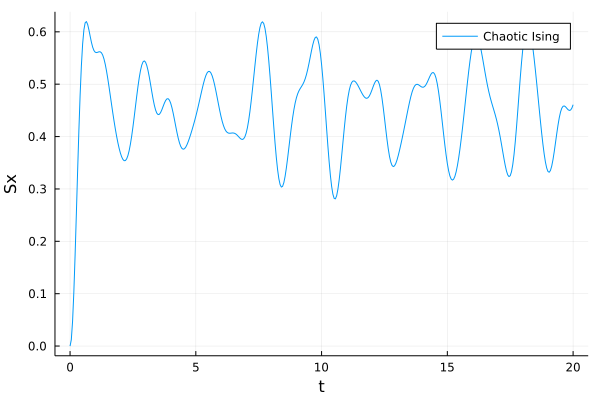

In [4]:
plot(x,Sx, label = "Chaotic Ising")
xlabel!("t")
ylabel!("Sx")